In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from hdf5storage import savemat
from hdf5storage import loadmat
import matplotlib.patches as mpatches
import matplotlib
from matplotlib.lines import Line2D      
import hickle

import sys
sys.path.append('../../src')

In [2]:
import evaluation.eval_rank as eval_rank
import evaluation.eval_utils as eval_utils

In [3]:
data_path = '../../data/opp8.hkl'
with open(data_path, 'r') as fin:
    data = hickle.load(fin)

test_gt = data['test_gt'][:,:,-1]

In [4]:
test_gt.shape

(119, 1024)

In [61]:
data.keys()

['test_gt',
 'validation_data',
 'train_gt',
 'validation_gt',
 'test_data',
 'train_data']

In [65]:
data['train_gt'].sum()

704437.0

In [5]:
data_num_step = 1024

In [6]:
test_gt_idx_changes = []
for i in range(len(test_gt)):
    idx_changes = np.where(test_gt[i]==1)[0]
    test_gt_idx_changes.append(idx_changes)    

In [7]:
#len(test_gt_idx_changes),
#for i in range(len(test_gt_idx_changes)):
#    print i, len(test_gt_idx_changes[i])
#idx 9 is choosen for visualization of a sample for the paper, it has 6 changes!

In [8]:
CNN_Wm_16 = loadmat("../../poc/pocCNN_16_1"+'.mat')['poc']
NWN_Wm_16 = loadmat("../../poc/pocDWN_16_1"+'.mat')['poc']
RCNN_Wm_16 = loadmat("../../poc/pocRCNN_Wmultitask_16_opp"+'.mat')['poc']

In [9]:
NewWavelet_16 = loadmat("../../poc/pocNewWavelet_16_1"+'.mat')['poc']

In [10]:
HRNN_NewWm_16 = loadmat("../../poc/pocHRNN_NewWavelet_Wmultitask_16_opp_20K_2"+'.mat')['poc']
HRNN_Wm_16 = loadmat("../../poc/pocHRNN_Wmultitask_16_opp2"+'.mat')['poc']

In [11]:
cpd_val_CNN16, cpd_CNN16 = eval_rank.non_max_supression(CNN_Wm_16, window=1, data_num_step=data_num_step)
cpd_val_NWN16, cpd_NWN16 = eval_rank.non_max_supression(NWN_Wm_16, window=1, data_num_step=data_num_step)
cpd_val_RCNN16, cpd_RCNN16 = eval_rank.non_max_supression(RCNN_Wm_16, window=1, data_num_step=data_num_step)
cpd_val_HRNN16, cpd_HRNN16 = eval_rank.non_max_supression(HRNN_Wm_16, window=1, data_num_step=data_num_step)
cpd_val_HRNN16_NewW, cpd_HRNN16_NewW = eval_rank.non_max_supression(HRNN_NewWm_16, window=1, data_num_step=data_num_step)

In [12]:
cpd_val_NewWavelet16, cpd_NewWavelet16 = eval_rank.non_max_supression(NewWavelet_16, window=1, data_num_step=data_num_step)

In [13]:
def tolerance_auc(cpd_val, cpd, gt_mean_test, tolerance):
    out_put = []
    for t in tolerance:
        print t
        out = eval_rank.parallel_ranking(cpd_val, cpd, gt_mean_test, t)
        out_put.append(eval_utils.calc_auc(zip(out[0], out[1]), gt_mean_test))
        
    return out_put    

In [14]:
tolerance = [2, 4, 8, 16, 32, 64, 128]

In [15]:
tol_auc_NewWavelet16 = tolerance_auc(cpd_val_NewWavelet16, cpd_NewWavelet16, test_gt_idx_changes, tolerance)

2
4
8
16
32
64
128


In [16]:
tol_auc_CNN16 = tolerance_auc(cpd_val_CNN16, cpd_CNN16, test_gt_idx_changes, tolerance)
tol_auc_NWN16 = tolerance_auc(cpd_val_NWN16, cpd_NWN16, test_gt_idx_changes, tolerance)
tol_auc_RCNN16 = tolerance_auc(cpd_val_RCNN16, cpd_RCNN16, test_gt_idx_changes, tolerance)
tol_auc_HRNN16 = tolerance_auc(cpd_val_HRNN16, cpd_HRNN16, test_gt_idx_changes, tolerance)
tol_auc_HRNN16_NewW = tolerance_auc(cpd_val_HRNN16_NewW, cpd_HRNN16_NewW, test_gt_idx_changes, tolerance)

2
4
8
16
32
64
128
2
4
8
16
32
64
128
2
4
8
16
32
64
128
2
4
8
16
32
64
128
2
4
8
16
32
64
128


/data2/data/zebrahim/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


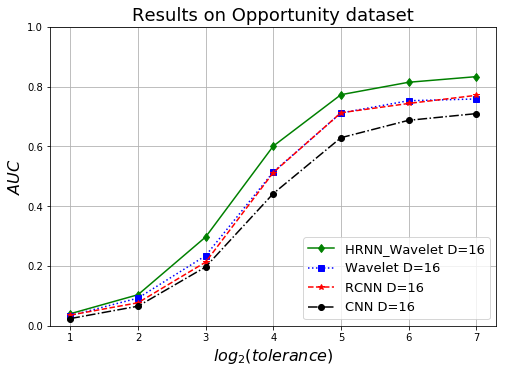

In [17]:
plt.figure(figsize=(8,5.5))

#plt.plot(np.log2(tolerance),tol_auc_HRNN16_2,'d-.b',label ='HRNN_2 D=16')

plt.plot(np.log2(tolerance),tol_auc_HRNN16_NewW,'d-g',label ='HRNN_Wavelet D=16')
#plt.plot(np.log2(tolerance),tol_auc_NewWavelet162,':sc',label ='NewW D=16')
plt.plot(np.log2(tolerance),tol_auc_NewWavelet16,':sb',label ='Wavelet D=16')
plt.plot(np.log2(tolerance),tol_auc_RCNN16,'--*r',label ='RCNN D=16')
#plt.plot(np.log2(tolerance),tol_auc_NWN16,'--oc',label ='DWN D=16')
plt.plot(np.log2(tolerance),tol_auc_CNN16,'-.ok',label ='CNN D=16')

font = {'family' : 'normal',
        'size'   : 15
         }

matplotlib.rc('font', **font)

plt.legend(loc='lower right', fontsize = 13)
plt.ylim([0,1], )
plt.grid()
plt.xlabel('$log_2(tolerance)$', fontsize = 16)
plt.ylabel('$AUC$', fontsize = 16)
plt.title("Results on Opportunity dataset")
# show the results
plt.show()

#save the results
#plt.savefig('../../plot/plt1.png', bbox_inches = 'tight')

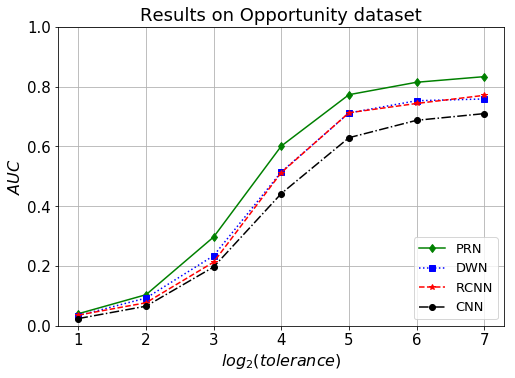

In [18]:
plt.figure(figsize=(8,5.5))

#plt.plot(np.log2(tolerance),tol_auc_HRNN16_2,'d-.b',label ='HRNN_2 D=16')

plt.plot(np.log2(tolerance),tol_auc_HRNN16_NewW,'d-g',label ='PRN')
#plt.plot(np.log2(tolerance),tol_auc_NewWavelet162,':sc',label ='NewW D=16')
plt.plot(np.log2(tolerance),tol_auc_NewWavelet16,':sb',label ='DWN')
plt.plot(np.log2(tolerance),tol_auc_RCNN16,'--*r',label ='RCNN')
#plt.plot(np.log2(tolerance),tol_auc_NWN16,'--oc',label ='DWN D=16')
plt.plot(np.log2(tolerance),tol_auc_CNN16,'-.ok',label ='CNN')

font = {'family' : 'normal',
        'size'   : 15
         }

matplotlib.rc('font', **font)

plt.legend(loc='lower right', fontsize = 13)
plt.ylim([0,1], )
plt.grid()
plt.xlabel('$log_2(tolerance)$', fontsize = 16)
plt.ylabel('$AUC$', fontsize = 16)
plt.title("Results on Opportunity dataset")
# show the results
#plt.show()

#save the results
plt.savefig('../../plot/plt3.png', bbox_inches = 'tight')

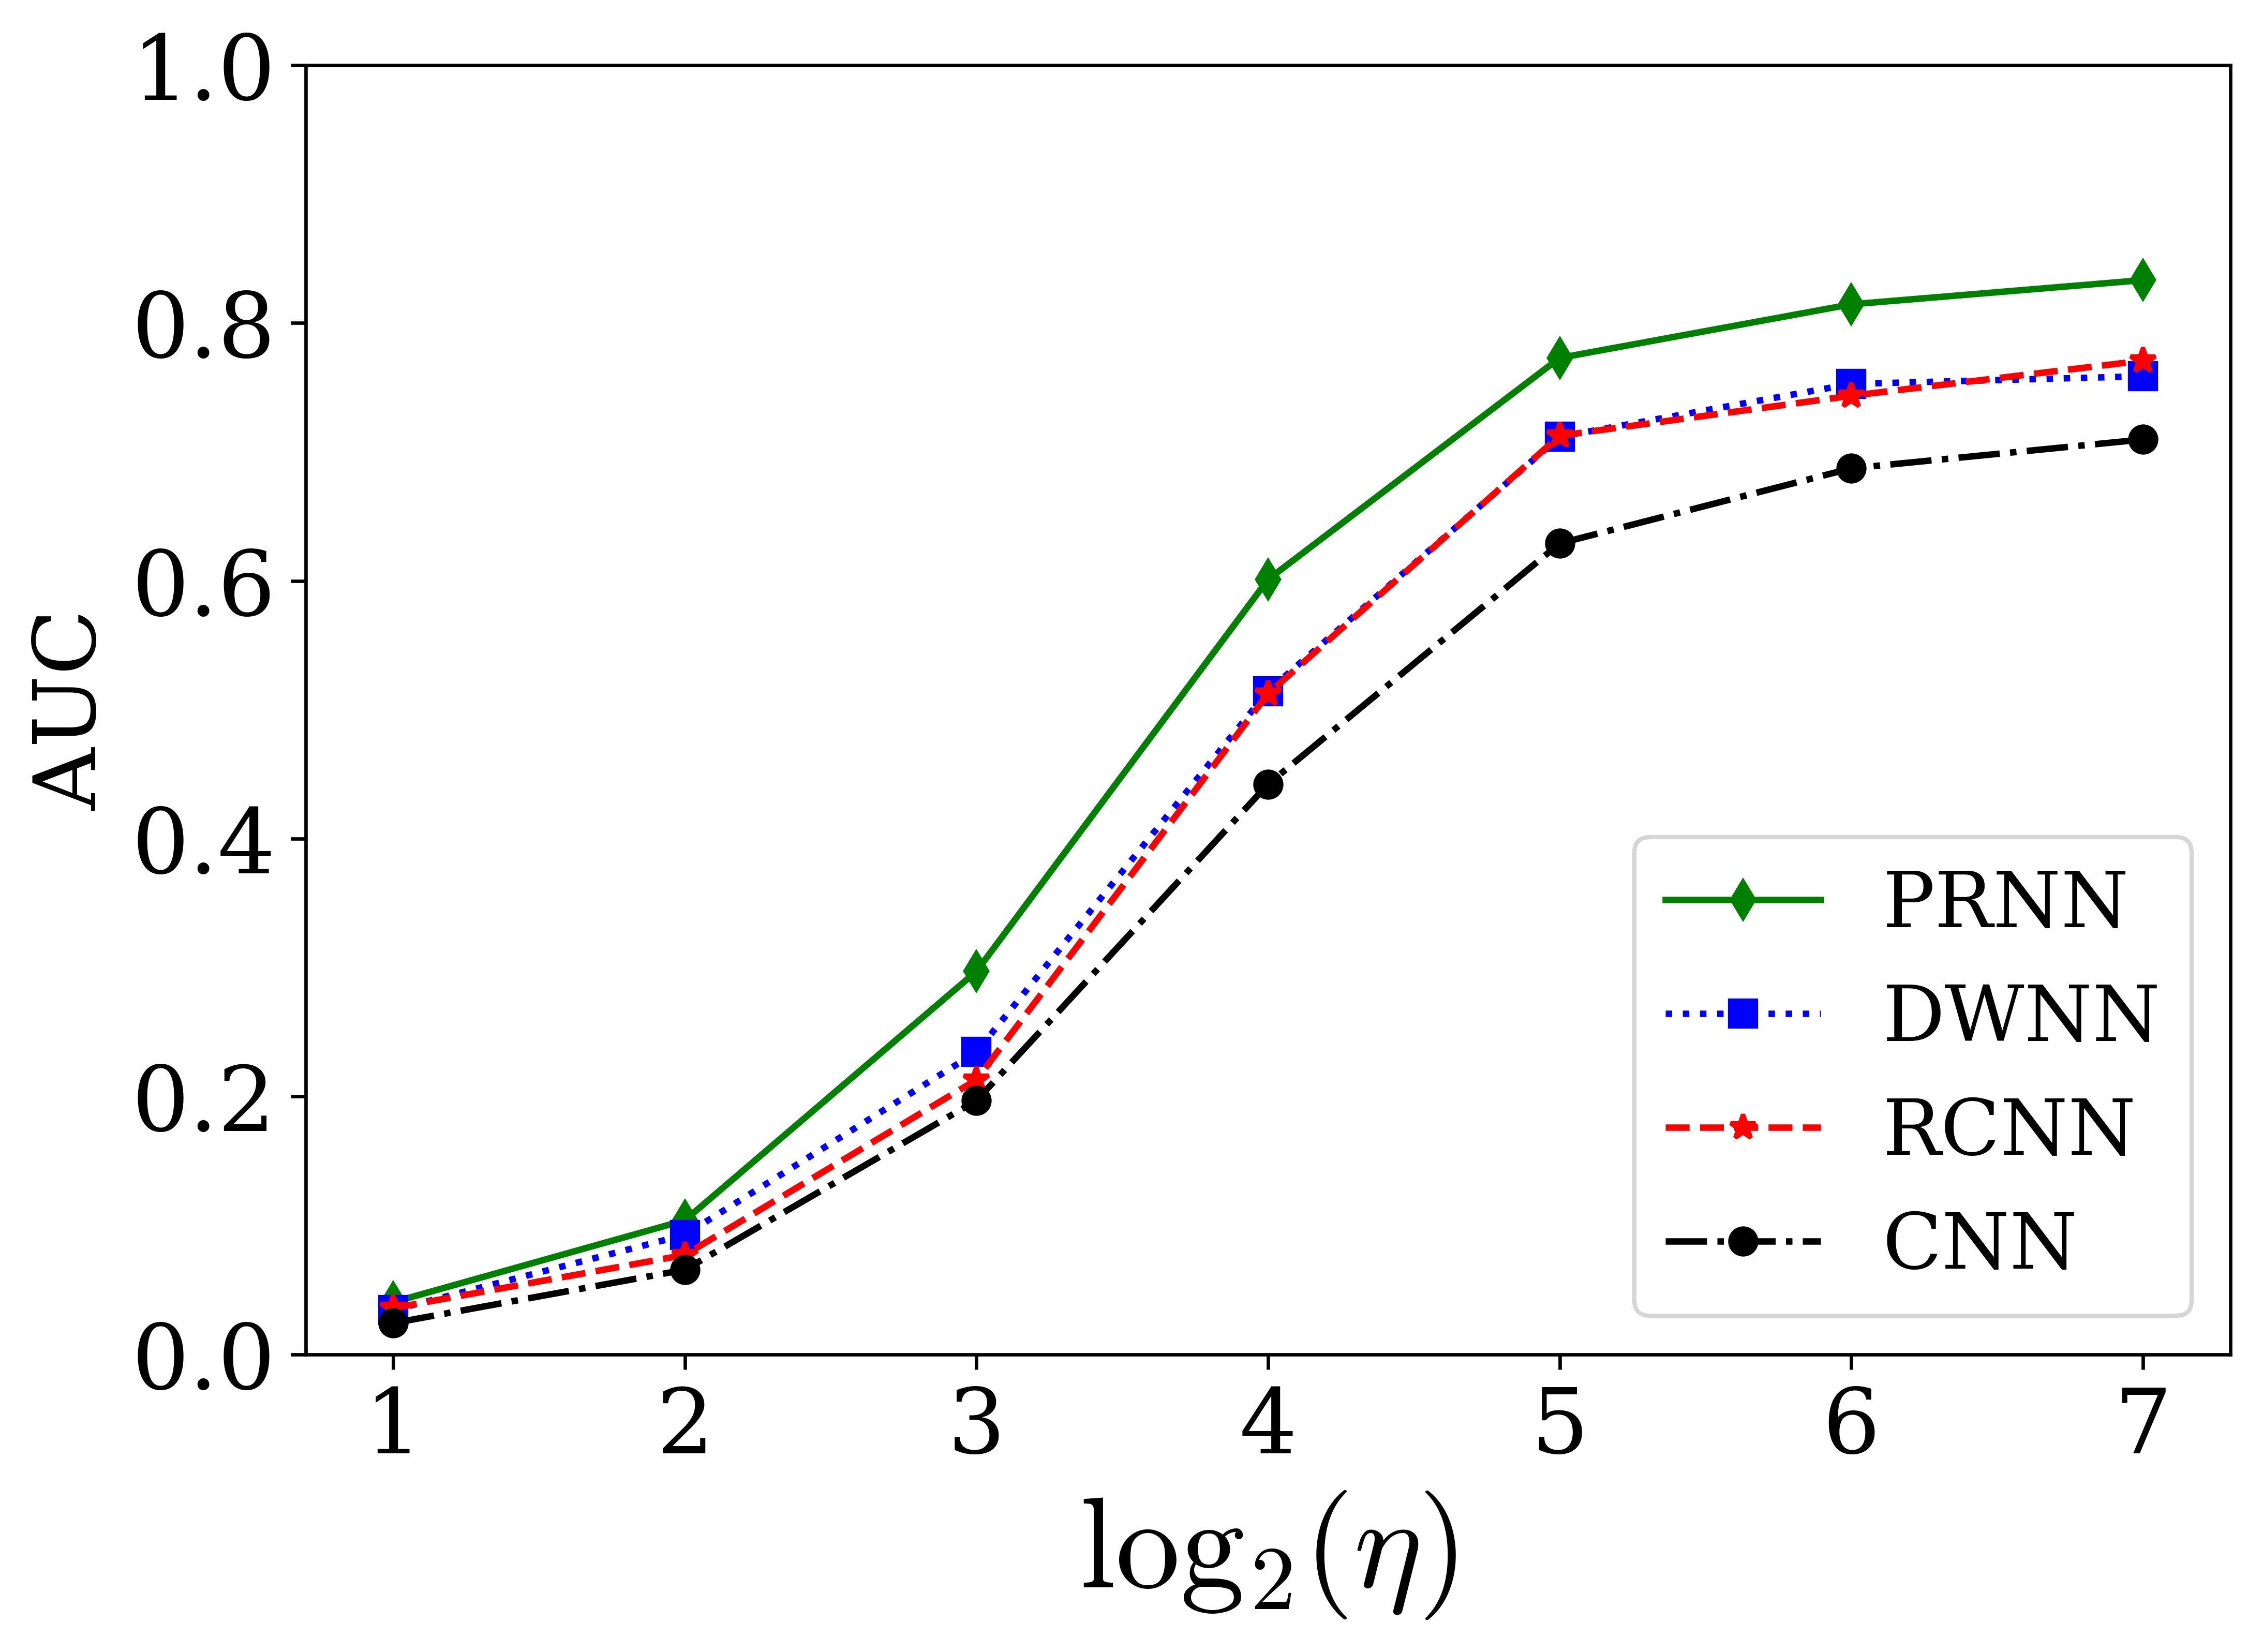

In [20]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'

plt.figure(figsize=(8,5.5), dpi=600)


plt.plot(np.log2(tolerance),tol_auc_HRNN16_NewW,'d-g',label ='PRNN')
plt.plot(np.log2(tolerance),tol_auc_NewWavelet16,':sb',label ='DWNN')
plt.plot(np.log2(tolerance),tol_auc_RCNN16,'--*r',label ='RCNN')
plt.plot(np.log2(tolerance),tol_auc_CNN16,'-.ok',label ='CNN')

font = {'family' : 'serif',
        'size'   : 21
         }

matplotlib.rc('font', **font)

plt.legend(loc='lower right', fontsize = 18)
plt.ylim([0,1], )
#plt.grid()
plt.xlabel('$\log_2(\eta)$', fontsize = 30)
plt.ylabel('AUC', fontsize = 20, fontname='serif')
#plt.title("Results on Opportunity dataset")
# show the results
#plt.show()

#save the results
plt.savefig('../../plot/plt_opp_2.png', bbox_inches = 'tight')

In [22]:
tol_auc_HRNN16_NewW

[0.040428923298035845,
 0.10395858923395171,
 0.29709817913951547,
 0.60114198610721659,
 0.77296331601704615,
 0.81453954659158978,
 0.83331792951733852]

In [23]:
tol_auc_NewWavelet16

[0.034316393408800612,
 0.092653323895803233,
 0.23447762310872125,
 0.51458337869521542,
 0.71180243436646051,
 0.75279951277621893,
 0.75870466000765135]

In [24]:
tol_auc_RCNN16

[0.035865080674475136,
 0.077094665859681333,
 0.21297229927222805,
 0.51250714059714153,
 0.71260159755224595,
 0.7436029108184975,
 0.77082794645899133]

In [25]:
tol_auc_CNN16

[0.024219275310879435,
 0.065581788496783991,
 0.19684264133848833,
 0.44227670891730475,
 0.62907916775213835,
 0.687280468736026,
 0.70968926369803809]

Time series visualization

[]

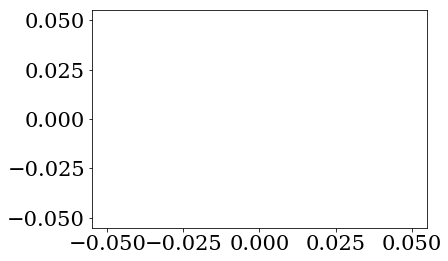

In [26]:
plt.plot()

In [27]:
np.transpose(data['test_data'][9])[0]

array([-0.988, -0.968, -0.953, ..., -0.944, -0.95 , -0.948])

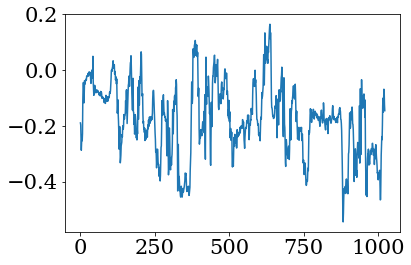

In [28]:
plt.plot(np.transpose(data['test_data'][9])[1])

In [29]:
def plot_timeseries(ts_idx, var1=0, var2=1, var3=2, thresh=0.5):
    matplotlib.rcParams['mathtext.fontset'] = 'cm'

    plt.figure(figsize=(8,15.5), dpi=600)

    f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(15,5))
    ax1.plot(np.transpose(data['test_data'][ts_idx])[var1])
    ax2.plot(np.transpose(data['test_data'][ts_idx])[var2])
    ax3.plot(np.transpose(data['test_data'][ts_idx])[var3])

    for i in test_gt_idx_changes[ts_idx]:
        ax1.add_line(Line2D([i,i],[-2,2], color='green'))     
        ax2.add_line(Line2D([i,i],[-2,2], color='green'))     
        ax3.add_line(Line2D([i,i],[-2,2], color='green'))     
        
    for i, val in zip(cpd_HRNN16_NewW[ts_idx], cpd_val_HRNN16_NewW[ts_idx]):
        if val < thresh:
            continue
        ax1.add_line(Line2D([i,i],[-2,2], color='red', linestyle=':'))  
        ax2.add_line(Line2D([i,i],[-2,2], color='red', linestyle=':'))  
        ax3.add_line(Line2D([i,i],[-2,2], color='red', linestyle=':'))  

    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

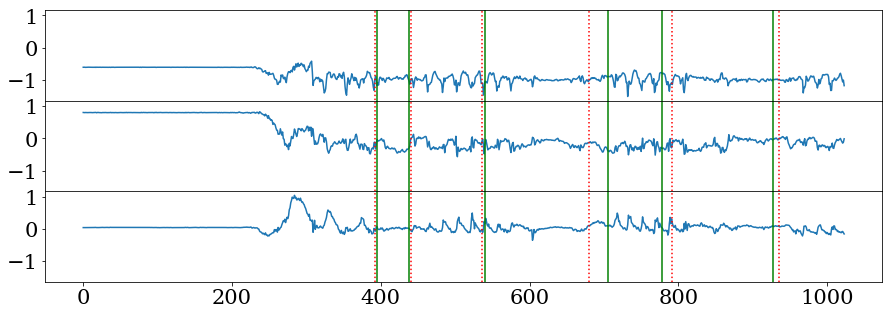

In [30]:
plot_timeseries(2, thresh=0.3)


In [31]:
test_gt_idx_changes[9]

array([ 426,  497,  561,  632,  930, 1020])

In [32]:
cpd_HRNN16_NewW[9]

array([    8.,    40.,    88.,   120.,   168.,   216.,   248.,   296.,
         328.,   360.,   392.,   424.,   456.,   504.,   536.,   568.,
         600.,   632.,   680.,   776.,   808.,   856.,   952.,  1016.])

In [33]:
cpd_val_HRNN16_NewW[9]

array([  2.09708451e-04,   2.38169217e-04,   8.05780331e-08,
         3.50023925e-07,   2.15965812e-07,   1.45390358e-08,
         3.49954789e-05,   2.94933830e-06,   2.94150144e-08,
         6.23311109e-08,   2.77952896e-08,   9.99999881e-01,
         5.79537300e-06,   4.12903070e-01,   9.29672539e-01,
         9.84309986e-02,   1.54330701e-04,   9.99765813e-01,
         2.28308927e-05,   5.37837423e-07,   3.87866294e-07,
         1.09830569e-06,   7.56394029e-01,   3.57428342e-02], dtype=float32)

In [34]:
cpd_scores = {
    'PRN': cpd_val_HRNN16_NewW,
    'DWN': cpd_val_NWN16,
    'RCNN': cpd_val_RCNN16,
    'CNN': cpd_val_CNN16,
}
cpd_idx = {
    'PRN': cpd_HRNN16_NewW,
    'DWN': cpd_NWN16,
    'RCNN': cpd_RCNN16,
    'CNN': cpd_CNN16,
}


In [59]:
def plot_timeseries_2(keys, ts_idx, var1=0, var2=1, var3=2, thresh=0.5):
    matplotlib.rcParams['mathtext.fontset'] = 'cm'

    plt.figure(figsize=(8,15.5), dpi=600)

    f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False, figsize=(15,5))
    ax1.plot(np.transpose(data['test_data'][ts_idx])[var1], 'k', label='data')
    ax2.plot(np.transpose(data['test_data'][ts_idx])[var2], 'k', label='data')
    ax3.plot(np.transpose(data['test_data'][ts_idx])[var3], 'k', label='data')

    ax1.get_yaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)
    
    ax1yrange = [np.transpose(data['test_data'][ts_idx])[var1].min(), np.transpose(data['test_data'][ts_idx])[var1].max()]
    ax2yrange = [np.transpose(data['test_data'][ts_idx])[var2].min(), np.transpose(data['test_data'][ts_idx])[var2].max()]
    ax3yrange = [np.transpose(data['test_data'][ts_idx])[var3].min(), np.transpose(data['test_data'][ts_idx])[var3].max()]
    ax3yrange2 = [ax3yrange[0]-(len(keys)+1)*(ax3yrange[1]-ax3yrange[0])*0.2, ax3yrange[1]]
    
    for i in test_gt_idx_changes[ts_idx]:
        ax1.add_line(Line2D([i,i], ax1yrange, color='green', label='true change'))     
        ax2.add_line(Line2D([i,i], ax2yrange, color='green', label='true change'))    
        ax3.add_line(Line2D([i,i], ax3yrange2, color='green', label='true change'))    
    
    
    colors = ['m', 'b', 'c', 'r']
    markers = ['d', '*', '^', 'o']
    for j, key in enumerate(keys):
        detections = np.asarray([i for i,val in zip(cpd_idx[key][ts_idx], cpd_scores[key][ts_idx]) if val > thresh])
        ax3.scatter(detections, (ax3yrange[0] - (j+1)*(ax3yrange[1]-ax3yrange[0])*0.2) * np.ones_like(detections), s=100, color=colors[j], marker=markers[j], label=key)
        ax1.scatter([], [], s=100, color=colors[j], marker=markers[j], label=key)
 
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

    plt.xlim([210, 1024])
    plt.xlabel('Time')
    plt.axes(ax1)
    plt.legend(fontsize=15, bbox_to_anchor=(0., 1.02, 1., .102),
               ncol=4, fancybox=True, shadow=True)
    
    
    

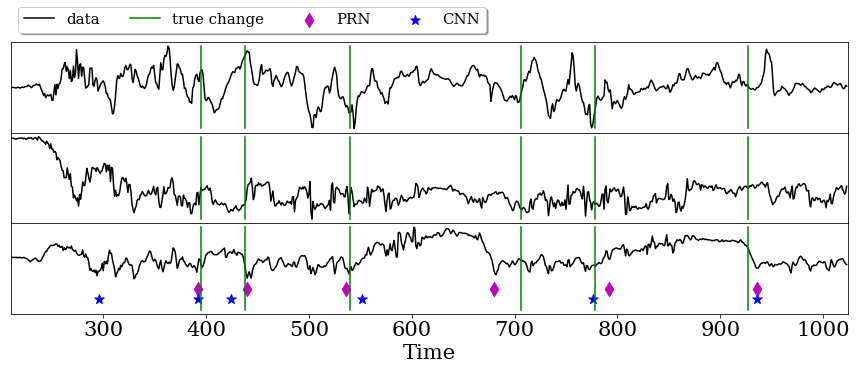

In [60]:
plot_timeseries_2(keys=['PRN', 'CNN'], var1=30, var2=1, var3=18, ts_idx=2, thresh=0.3)
plt.savefig('../../plot/opp_sample.png', bbox_inches = 'tight')

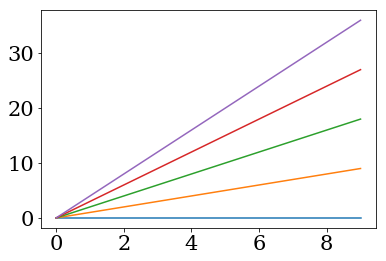

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)

fig = plt.figure()
ax = plt.subplot(111)

for i in xrange(5):
    line, = ax.plot(x, i * x, label='$y = %ix$'%i)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()
